**Task 1**

In [57]:
#necessary imports
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt 
import math

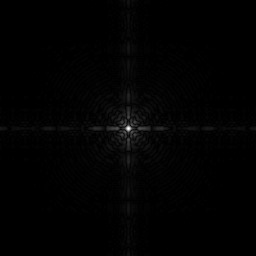

-1

In [74]:
image = cv2.imread('/content/1.jpg',0)

image = np.array(image)

cv2_imshow(image)
cv2.waitKey(0)

In [65]:
type(image)

numpy.ndarray

In [68]:
def log_function(c,img):
  img = c*np.log10(1+img)
    
  max = np.max(img)
  min = np.min(img)

  img = ((img - min)/(max-min))*255
  return img

In [69]:
img_1 = log_function(3,image)
cv2_imshow(img_1)
cv2.waitKey(0)

-1

**We know the log transformation converts a dark image to a brighter one by stretching the contrast. And that can be easily noticed from the before and afert picture, how the dark image turned brighter. We can increase the parameter "c" to have more brightening effects**

In [70]:
def power_law(c,gamma,img):

  img = c*np.power(img,gamma)

  max = np.max(img)
  min = np.min(img)

  img = ((img - min)/(max-min))*255

  return img

In [71]:
#let's load a bright image
bright_image = cv2.imread('/content/bright_image.tif',0)

bright_image = np.array(bright_image)

cv2_imshow(bright_image)
cv2.waitKey(0)

-1

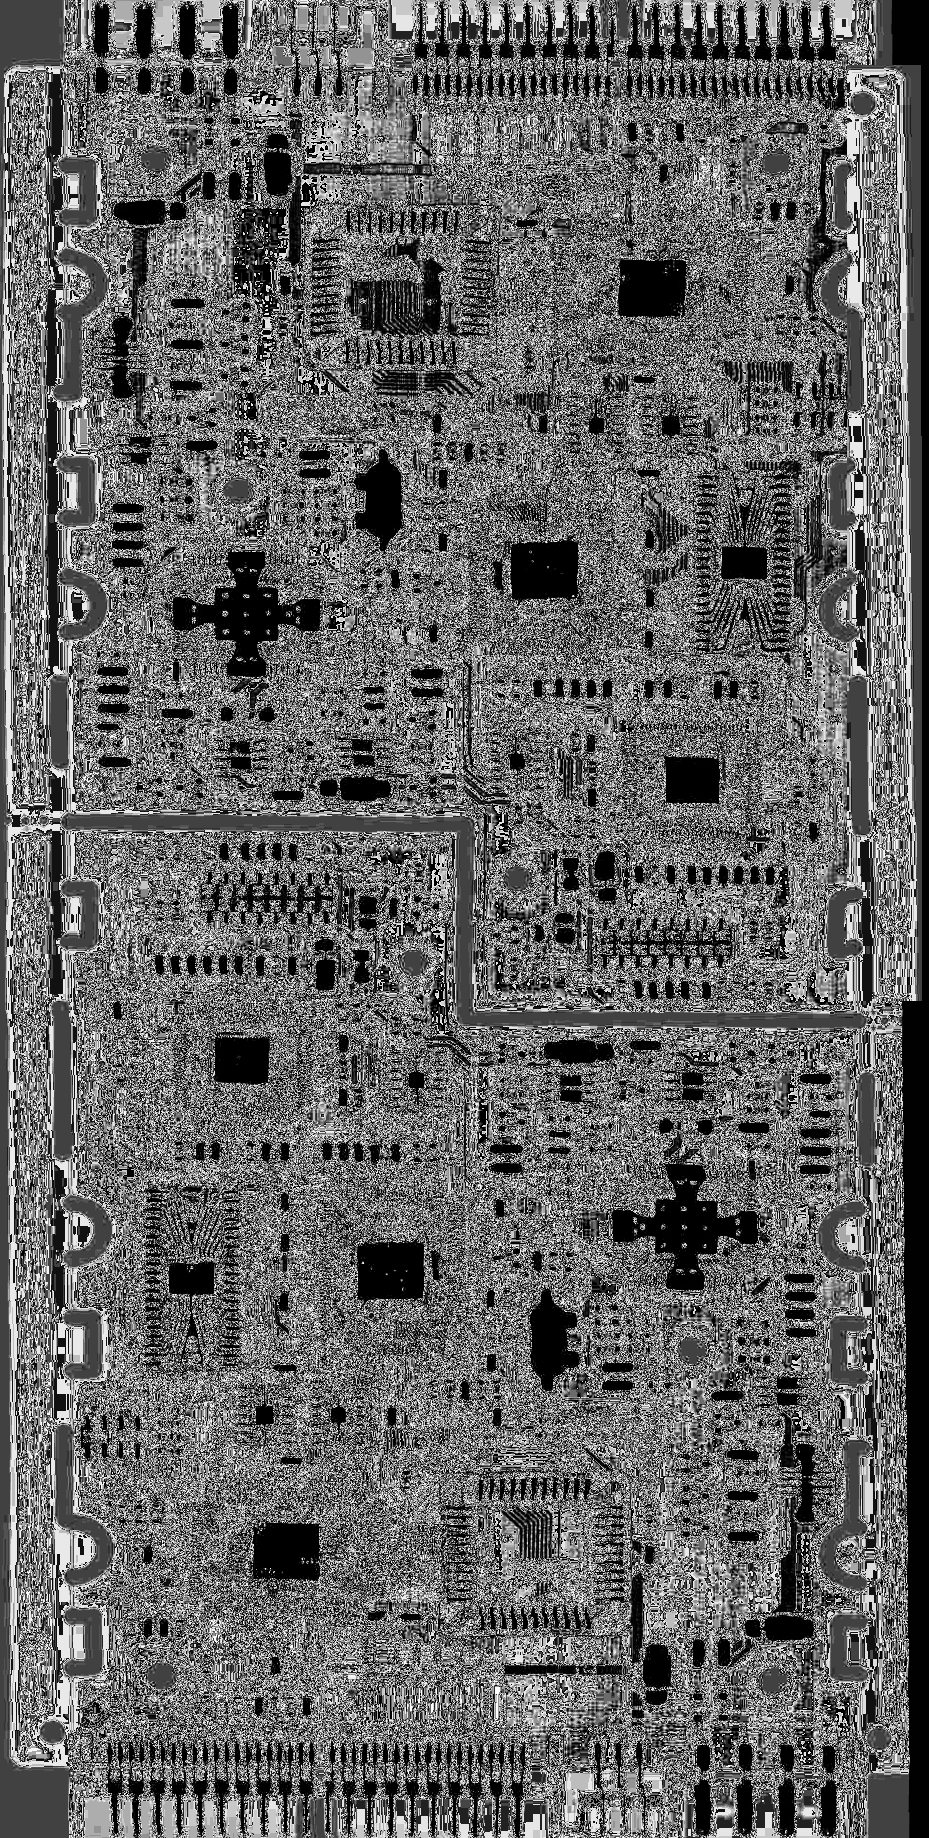

-1

In [73]:
#gamma greater than 1
img_2 = power_law(1,2,bright_image)
cv2_imshow(img_2)
cv2.waitKey(0)

**With gamma value greater than one a bright image should have been converted into a darker image theoritically and as we can the brighter image has turned dark**

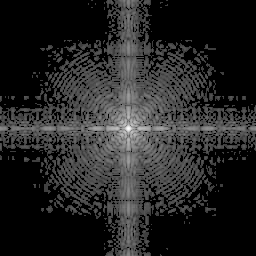

-1

In [76]:
#gamma less than 1
img_2 = power_law(1,0.25,image)
cv2_imshow(img_2)
cv2.waitKey(0)

**As we can see with gamma values less than one dark images have been transfromed into a bright image**

**Discussion**

In general transformation functions are used to improve the contrast of an image. Log transformation and power law with gamma < 1 is suitable for turning images dominated by lower gray level values into an image dominated by higher gray level values. Power law with gamma > 1 is used for turning bright images into dark images

Intensity scaling is required as the trasnformation function alone mas input values ranging from (0-255)[8 bit gray scale images] into output values with a different range. So to keep the range of both input and output images constant we scale the intensities

**Task 2**

In [143]:
image = cv2.imread('/content/image_2.tif',0)

image = np.array(image)

cv2_imshow(image)
cv2.waitKey(0)

-1

In [144]:
def histogram(img):
  array_count = np.zeros([256])
  h,w=img.shape
  for i in range(h):
    for j in range(w):
      var = img[i,j]
      array_count[var]+=1
  return array_count

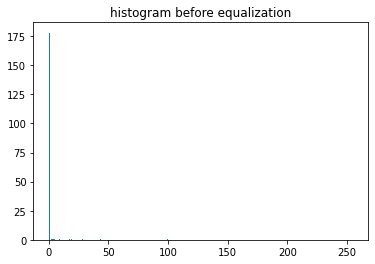

In [145]:
histo = histogram(image)
plt.hist(histo, bins = np.linspace(0, 255, 256)) 
plt.title("histogram before equalization") 
plt.show()

**As we can see there is a dominance of gray scale values of the lower range, and as a result we can see this image has poor contrast**

In [146]:
pdf = histo/np.sum(histo)

In [147]:
cdf = np.cumsum(pdf)
scaled_cdf = np.around(cdf * 255)

In [148]:
def histogram_equalisation(scaled_cdf,img):
  h,w=img.shape

  for i in range(h):
    for j in range(w):
      img[i,j] = scaled_cdf[img[i,j]]
  
  return img

In [149]:
equalized_img = histogram_equalisation(scaled_cdf, image)
cv2_imshow(equalized_img)
cv2.waitKey(0)

-1

**We can see that the contrast of the image imrpoves drastically by using the normalized CDF of the image as a transformation function**

In [150]:
histo = histogram(equalized_img)
plt.hist(histo, bins = np.linspace(0, 255, 256)) 
plt.title("histogram after equalization") 
plt.show()

**The histogram is also much more spaced out and isn't skewed in one particular direction**

**checking the effect of suuccesive histogram equalisation**

---



In [151]:
pdf = histo/np.sum(histo)

In [152]:
cdf = np.cumsum(pdf)
scaled_cdf = np.around(cdf * 255)

In [153]:
equalized_img_2 = histogram_equalisation(scaled_cdf, image)
cv2_imshow(equalized_img_2)
cv2.waitKey(0)

-1

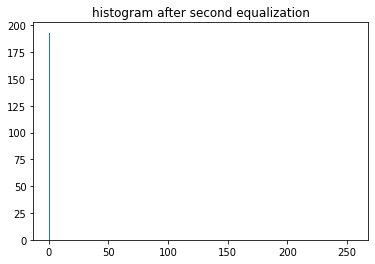

In [154]:
histo = histogram(equalized_img_2)
plt.hist(histo, bins = np.linspace(0, 255, 256)) 
plt.title("histogram after second equalization") 
plt.show()

**Discussion**

As we can see succesive histogram equalisation does not improve the contrat further.This is beacuse after one equalization the pdf of the image is already spreaded out, and succesive equalisations won't spread the pdf even further

**Task 3**

In [171]:
image = cv2.imread('/content/image_2.tif',0)

image = np.array(image)

cv2_imshow(image)
cv2.waitKey(0)

-1

In [172]:
def global_histogram_equalization(img,patch_size):

  for r in range(0,img.shape[0],patch_size):
    for c in range(0,img.shape[1],patch_size):
      img_patch = img[r:r+patch_size,c:c+patch_size]
      histo = histogram(img_patch)
      pdf = histo/np.sum(histo)
      cdf = np.cumsum(pdf)
      scaled_cdf = np.around(cdf * 255)
      equalized_patch = histogram_equalisation(scaled_cdf, img_patch)
      img[r:r+patch_size,c:c+patch_size] = equalized_patch
  return img

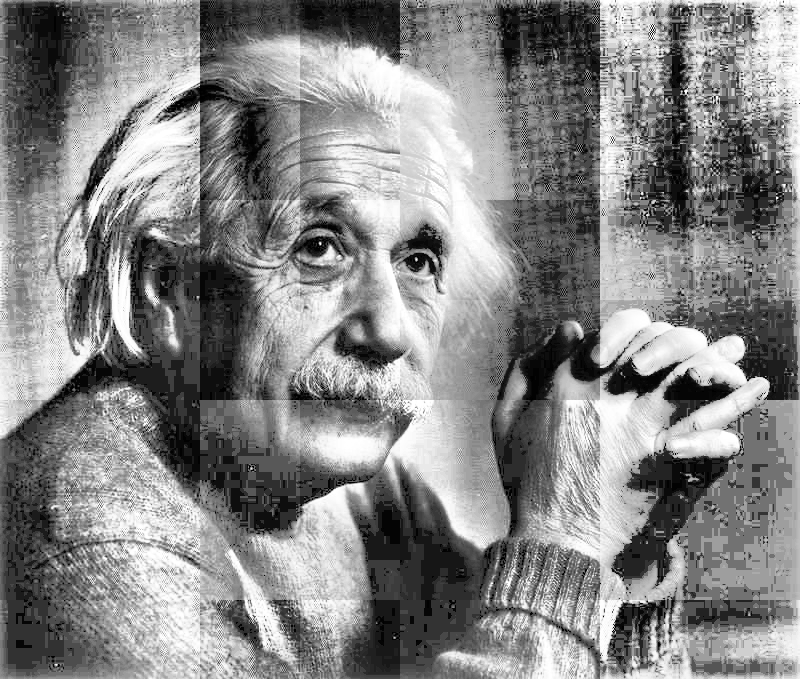

-1

In [175]:
LHE_Image = global_histogram_equalization(image,200)
cv2_imshow(LHE_Image)
cv2.waitKey(0)

**Discussion**

As we can see there are some annoying side effects at the border region of the patches, that is beacause each patch has it's own histogram equalisation function calculated from the pdf and cdf of that local patch. Hence the transformation of each patch is also different. The size of the patch can be varied and checked for more annoying side effects at different patch sizes